<a href="https://colab.research.google.com/github/Sawarijamgaonkar/Next_Gen_Dev/blob/main/spam_sms_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
messages = [line.rstrip() for line in open('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/SMSSpamCollection.txt')]

In [ ]:
len(messages)

5574

In [ ]:

for messno, msg in enumerate(messages[:20]):
    print(messno, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [ ]:
import pandas as pd

messages = pd.read_csv('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/SMSSpamCollection.txt', sep='\t', names = ['label', 'message'])

messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.groupby('label').describe()

message         \
        count unique   
label                  
ham    4825    4516    
spam   747     653     

                                                                                                                                                            \
                                                                                                                                                       top   
label                                                                                                                                                        
ham    Sorry, I'll call later                                                                                                                                
spam   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!   

            
      freq  
label       
ham    30   
spam   4

In [ ]:
messages['length'] = messages['message'].apply(len)

messages.head(6)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",147


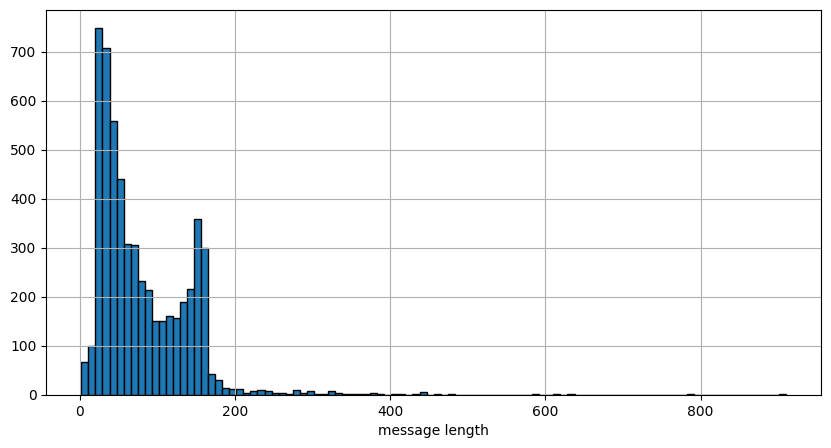

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.xlabel('message length')
messages['length'].hist(bins=100, edgecolor='black', figsize=(10,5))
plt.savefig('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/Ouput/Histogram1.png')

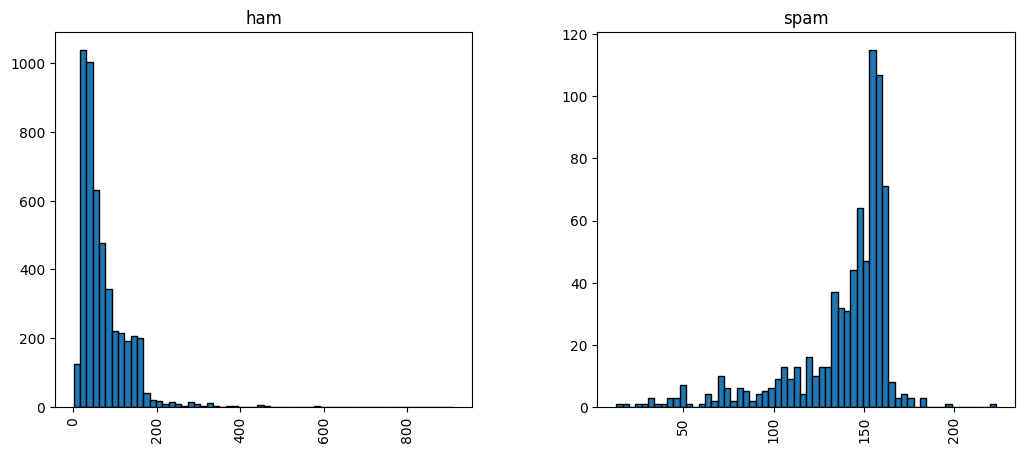

In [ ]:
messages.hist(column='length',by='label',bins=60,figsize=(12,5),edgecolor='black')
plt.savefig('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/Ouput/Histogram2.png')

In [ ]:
def text_process(data):
    '''
    1. remove punc
    2. do stemming of words
    3. remove stop words
    4. return list of clean text words
    '''
    nopunc = [c for c in data if c not in string.punctuation] #remove punctuations
    nopunc = ''.join(nopunc)

    stemmed = ''
    nopunc = nopunc.split()
    for i in nopunc:
        stemmer = SnowballStemmer('english')
        stemmed += (stemmer.stem(i)) + ' ' # stemming of words

    clean_msgs = [word for word in stemmed.split() if word.lower() not in stopwords.words('english')] # remove stopwords

    return clean_msgs

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
nltk.download('stopwords')

def loadData():

    messages = pd.read_csv('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/SMSSpamCollection.txt', sep='\t', names = ['label', 'message'])
    messages['length'] = messages['message'].apply(len)

    return messages

def text_process(data):
    '''
    1. remove punc
    2. do stemming of words
    3. remove stop words
    4. return list of clean text words
    '''
    nopunc = [c for c in data if c not in string.punctuation] #remove punctuations
    nopunc = ''.join(nopunc)

    stemmed = ''
    nopunc = nopunc.split()
    for i in nopunc:
        stemmer = SnowballStemmer('english')
        stemmed += (stemmer.stem(i)) + ' ' # stemming of words

    clean_msgs = [word for word in stemmed.split() if word.lower() not in stopwords.words('english')] # remove stopwords

    return clean_msgs

def main():

    messages = loadData()
    #print(messages)
    messages['processed_msg'] = messages['message'].apply(text_process)

    print('\n################################################## Processed Messages ##################################################\n')
    with pd.option_context('expand_frame_repr', False):
        print (messages)
    #print(messages)

    messages.to_csv('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/Ouput/processed_msgs.csv', encoding='utf-8', index=False) #copy processed messages dataframe to a new csv file

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



################################################## Processed Messages ##################################################

     label                                                                                                                                                           message  length                                                                                                                                                 processed_msg
0     ham   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                                   111     [go, jurong, point, crazi, avail, onli, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]                                                         
1     ham   Ok lar... Joking wif u oni...                                                                                                                                     29      [ok, lar, joke, w

In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', 1)

def Tfidf_Vectorization(messages):
    '''
    1. Convert word tokens from processed msgs dataframe into a bag of words
    2. Convert bag of words representation into tfidf vectorized representation for each message
    '''
    bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
    bow = bow_transformer.transform(messages['message']) # bag of words

    tfidf_transformer = TfidfTransformer().fit(bow)
    tfidf_vect = tfidf_transformer.transform(bow) # tfidf vector representation

    pickle.dump(tfidf_vect, open("/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/Ouput/tfidf_vector.pickle", "wb")) # stores tfidf vector in a pickle file so it could be used later in future scripts

    return tfidf_vect

def TrainTestSplit(feature_vect, messages):
    '''
    Split dataset into training and test sets. We use a 70/30 split.
    '''
    X_train, X_test, y_train, y_test = train_test_split(feature_vect, messages['label'], test_size = 0.3, random_state = 101)

    return X_train, X_test, y_train, y_test

def train_classifier(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)

def predict_labels(classifier, X_test):
    return (classifier.predict(X_test))



In [ ]:
def main():

    df= pd.read_csv('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/Ouput/processed_msgs.csv')

    tfidf_vect = Tfidf_Vectorization(messages)

    # append our message length feature to the tfidf vector to produce the final feature vector we fit into our classifiers
    len_feature = df.to_numpy()
    feat_vect = np.hstack((tfidf_vect.todense(), len_feature[:]))

    X_train, X_test, y_train, y_test = TrainTestSplit(feat_vect, messages)

    svm = SVC()
    dtree = DecisionTreeClassifier()
    mnb = MultinomialNB()
    knn = KNeighborsClassifier()
    rfc = RandomForestClassifier()
    ada_boost = AdaBoostClassifier()
    bagging_clf = BaggingClassifier()

    classifiers = {'SVM': svm, 'Decision Tree': dtree, 'Multinomial NB': mnb, 'KNN': knn, 'Random Forest': rfc,
                   'AdaBoost': ada_boost, 'Bagging Classifier': bagging_clf}

    X_train2, X_test2 = train_test_split(messages['message'], test_size = 0.3, random_state = 101)
    pred_scores = []
    pred = dict()
    file = open('/content/drive/MyDrive/Next_Gen_Dev/spam_sms_detection/Ouput/misclassified_msgs.txt', 'a', encoding='utf-8') # misclassified messages will be written in this
    for k, v in classifiers.items():
        train_classifier(v, X_train, y_train, batch_size=128)
        pred[k] = predict_labels(v, X_test)
        pred_scores.append((k, [accuracy_score(y_test, pred[k])]))
        print('\n############### ' + k + ' ###############\n')
        print(classification_report(y_test, pred[k]))

        # write misclassified messages into a new text file
        file.write('\n#################### ' + k + ' ####################\n')
        file.write('\nMisclassified as Spam:\n\n')
        for msg in X_test2[y_test < pred[k]]:
            file.write(msg)
            file.write('\n')
        file.write('\nMisclassified as Ham:\n\n')
        for msg in X_test2[y_test > pred[k]]:
            file.write(msg)
            file.write('\n')
    file.close()

    print('\n############### Accuracy Scores ###############')
    accuracy = pd.DataFrame.from_items(pred_scores, orient = 'index', columns = ['Accuracy Rate'])
    print('\n')
    print(accuracy)
    print('\n')

    #plot accuracy scores in a bar plot
    accuracy.plot(kind =  'bar', ylim=(0.85,1.0), figsize=(10,5))
    plt.title('Distribution by Classifier')
    plt.legend()

if __name__ == "__main__":
    main()

NameError: name 'pd' is not defined